In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

In [2]:
df=pd.read_csv(r"C:\Users\Jeet Ghosh\Downloads\excel\archive_2\marathon.csv")

C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8332\2678813253.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Jeet Ghosh\Downloads\excel\archive_2\marathon.csv")


In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


#Event dates, Event name, Event distance/length, Event number of finishers, Athlete performance, Athlete country, Athlete year of birth,
#Athlete gender,Athelete average speed.

#I want only the atheletes from USA.

#rewriteing the column names in lower and without.

#need the age of each athelete by subtracting the year of event from the year of birth.

#cleaning the data and changing dtypes.

#exploratory data analysis and visualization

#storytelling with visualizations

In [4]:
df.shape

(7461195, 13)

In [5]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.461195e+06,7.461195e+06,6.873034e+06,7.461195e+06
mean,2.011983e+03,1.451969e+03,1.969762e+03,5.536261e+05
std,1.000844e+01,3.124784e+03,1.312560e+01,4.801613e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.010000e+03,8.800000e+01,1.962000e+03,1.357120e+05
50%,2.015000e+03,2.350000e+02,1.971000e+03,3.944680e+05
75%,2.018000e+03,8.670000e+02,1.979000e+03,1.037699e+06
max,2.022000e+03,2.002700e+04,2.021000e+03,1.641167e+06


                                                        Data cleaning                                                                       

In [6]:
#deleting the null values
df.dropna(inplace=True)

In [7]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

So I have only took the runners who are from usa

In [8]:
df=df[df["Athlete country"]=="USA"].reset_index(drop=True)

Rewrite the columns name in lower and removing spaces between them

In [9]:
new_col=[i.lower().replace(" ","_") for i in df.columns]
df.columns=new_col

altering the table data types and columns

In [10]:
df["athlete_year_of_birth"]=pd.to_datetime(df["athlete_year_of_birth"],format="%Y").dt.year

In [11]:
df["event_dates"]=pd.to_datetime(df["event_dates"],errors="coerce")

creating a new column of runners age

In [12]:
df["athelete_age"]=df["year_of_event"]-df["athlete_year_of_birth"]

In [13]:
df.columns

Index(['year_of_event', 'event_dates', 'event_name', 'event_distance/length',
       'event_number_of_finishers', 'athlete_performance', 'athlete_club',
       'athlete_country', 'athlete_year_of_birth', 'athlete_gender',
       'athlete_age_category', 'athlete_average_speed', 'athlete_id',
       'athelete_age'],
      dtype='object')

In [14]:
#removing unnecessary columns
df.drop(["year_of_event","athlete_year_of_birth","athlete_id","athlete_country","athlete_age_category"],axis=1,inplace=True)

In [15]:
df.dtypes

event_dates                  datetime64[ns]
event_name                           object
event_distance/length                object
event_number_of_finishers             int64
athlete_performance                  object
athlete_club                         object
athlete_gender                       object
athlete_average_speed                object
athelete_age                          int64
dtype: object

Cleaning the data

In [16]:
#here the best way to go is to extract the data in two parts using regex, extract the distance value and units, then see the uniq count of units and fix those rows
df["event_distance/length"].unique()

array(['50mi', '50km', '28mi', '164km', '33mi', '6h', '9h', '24h', '12h',
       '100mi', '52.9km', '48h', '196km/4Etappen', '48.2km', '52.6km',
       '80km', '45km', '100km', '10h', '51.4mi', '32h', '150km/3Etappen',
       '11h', '7h', '60km', '35h', '40mile', '42.4mi', '29.3mi', '34mi',
       '55km', '75mi', '40mi', '47km', '64km', '52km', '71mi', '30h',
       '15h', '130km/2Etappen', '125km', '72h', '28.2mi', '8h', '135mi',
       '45.4km', '70km', '54km', '108km', '200mi', '150mi', '52mi',
       '57km', '46.5mi', '97mi/3Etappen', '49.2km', '130km', '51km',
       '48km', '85km', '115km', '101km', '170km', '53km', '103km', '17h',
       '32.5mi', '88km', '33.5mi', '44.4mi', '35mi', '67km', '59km',
       '74km', '51mi', '110km', '168km', '81km', '163km', '73km', '46km',
       '66km', '68mi', '56km', '155mi', '51.3km', '30mi', '5h', '90km',
       '105km', '32mi', '22h', '109.8km', '81.3km', '127km', '113km',
       '70.5mi', '38mi', '112mi', '60mi', '52.4mi', '36h', '104.8mi',

In [17]:
# Extract numeric and unit parts using regex
df['distance_value'] = df['event_distance/length'].str.extract(r'(\d+\.?\d*)')  # Numeric part
df['distance_unit'] = df['event_distance/length'].str.extract(r'([a-zA-Z]+)')   # Unit part

# Convert 'distance_value' to float for numerical analysis
df['distance_value'] = df['distance_value'].astype(float)

# Display the updated DataFrame
print(df.head())


  event_dates                                     event_name  \
0  2018-06-01  Yankee Springs 50 Mile Winter Challenge (USA)   
1  2018-06-01  Yankee Springs 50 Mile Winter Challenge (USA)   
2  2018-06-01  Yankee Springs 50 Mile Winter Challenge (USA)   
3  2018-06-01  Yankee Springs 50 Mile Winter Challenge (USA)   
4  2018-06-01  Yankee Springs 50 Mile Winter Challenge (USA)   

  event_distance/length  event_number_of_finishers athlete_performance  \
0                  50mi                          9           9:53:05 h   
1                  50mi                          9          11:38:17 h   
2                  50mi                          9          11:56:35 h   
3                  50mi                          9          12:32:16 h   
4                  50mi                          9          12:39:36 h   

       athlete_club athlete_gender athlete_average_speed  athelete_age  \
0  *Middleville, MI              M                 8.141            35   
1        *Utica, MI   

In [18]:
#dont need "h","d","x","nan" units, so removing those rows
df["distance_unit"].unique()

array(['mi', 'km', 'h', 'mile', 'k', 'd', 'K', 'x', 'Km', nan, 'Mile',
       'Miles', 'miles'], dtype=object)

In [19]:
df = df.drop(df[df['distance_unit'].isin(["h","d","x","nan"])].index)

In [20]:
#here i need to replace the "Km" with "km" and "Mile" with "mi" and "Miles" with "mi" and "K" with "km"
df["distance_unit"].unique()

array(['mi', 'km', 'mile', 'k', 'K', 'Km', nan, 'Mile', 'Miles', 'miles'],
      dtype=object)

In [21]:
#replacing all the values
df["distance_unit"].replace("Km","km",inplace=True)
df["distance_unit"].replace("Mile","mi",inplace=True)
df["distance_unit"].replace("miles","mi",inplace=True)
df["distance_unit"].replace("Miles","mi",inplace=True)
df["distance_unit"].replace("K","km",inplace=True)

C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8332\2257688818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["distance_unit"].replace("Km","km",inplace=True)
C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8332\2257688818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [22]:
#converting all miles to km
df["distance_value"] = np.where(df["distance_unit"] == "mi", df["distance_value"] * 1.60934, df["distance_value"])

In [23]:
#dropping the "event_distance/length" and distance_unit columns
df.drop(["event_distance/length","distance_unit"],axis=1,inplace=True)

In [24]:
df


,event_dates,event_name,event_number_of_finishers,athlete_performance,athlete_club,athlete_gender,athlete_average_speed,athelete_age,distance_value
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,9:53:05 h,"*Middleville, MI",M,8.141,35,80.467
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,11:38:17 h,"*Utica, MI",M,6.914,32,80.467
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,11:56:35 h,"*Grass Lake, MI",M,6.738,30,80.467
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,12:32:16 h,"*Olaton, KY",M,6.418,23,80.467
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,12:39:36 h,"*Wyoming, MI",M,6.356,39,80.467
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,5:22:10 h,"*Peachtree City, GA",F,9312.0,35,50.000
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,5:22:10 h,"*Fayetteville, GA",M,9312.0,50,50.000
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,5:22:58 h,"*Millen, GA",F,9289.0,58,50.000
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,5:28:43 h,"*Winston-Salem, NC",M,9126.0,51,50.000


In [25]:
#removing h from athelete performance and converting it to minutes
df['athlete_performance'] = df['athlete_performance'].str.replace('h', '')


In [26]:
#removing all the rows which have "d" in athelete performance
df.drop(df[df['athlete_performance'].str.contains('[a-zA-Z]')].index, inplace=True)

In [27]:
def convert_to_minutes(time_str):
    hours, minutes, seconds = map(int, time_str.split(":"))
    return (hours*60) + (minutes) + (seconds / 60)

df['athlete_performance'] = df['athlete_performance'].apply(convert_to_minutes)

In [28]:
df["athlete_performance"]=df["athlete_performance"].astype(float).round(2)

In [29]:
df

,event_dates,event_name,event_number_of_finishers,athlete_performance,athlete_club,athlete_gender,athlete_average_speed,athelete_age,distance_value
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"*Middleville, MI",M,8.141,35,80.467
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"*Utica, MI",M,6.914,32,80.467
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"*Grass Lake, MI",M,6.738,30,80.467
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"*Olaton, KY",M,6.418,23,80.467
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"*Wyoming, MI",M,6.356,39,80.467
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"*Peachtree City, GA",F,9312.0,35,50.000
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"*Fayetteville, GA",M,9312.0,50,50.000
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"*Millen, GA",F,9289.0,58,50.000
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"*Winston-Salem, NC",M,9126.0,51,50.000


In [30]:
#rename athlete performance to athelete_performance(min) and distance_value to distance(km)
df.rename(columns={"athlete_performance": "athelete_performance(min)", "distance_value": "distance(km)"}, inplace=True)

In [31]:
#removing athelete_average_speed column and creating athelete_avg_speed(km/h) with (distance(km)/(athelete_performance(min)/60))
df.drop(["athlete_average_speed"],axis=1,inplace=True)

In [32]:
df["athelete_avg_speed(km/h)"] = df["distance(km)"] / (df["athelete_performance(min)"]/60).astype(float).round(2)

In [33]:
df

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"*Middleville, MI",M,35,80.467,8.144433
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"*Utica, MI",M,32,80.467,6.912973
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"*Grass Lake, MI",M,30,80.467,6.739280
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"*Olaton, KY",M,23,80.467,6.416826
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"*Wyoming, MI",M,39,80.467,6.356003
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"*Peachtree City, GA",F,35,50.000,9.310987
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"*Fayetteville, GA",M,50,50.000,9.310987
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"*Millen, GA",F,58,50.000,9.293680
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"*Winston-Salem, NC",M,51,50.000,9.124088


In [34]:
#removing "*" from the athelete_club column data
df["athlete_club"] = df["athlete_club"].str.replace('*', '')

In [35]:
df

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"Middleville, MI",M,35,80.467,8.144433
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"Utica, MI",M,32,80.467,6.912973
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"Grass Lake, MI",M,30,80.467,6.739280
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"Olaton, KY",M,23,80.467,6.416826
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"Wyoming, MI",M,39,80.467,6.356003
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Peachtree City, GA",F,35,50.000,9.310987
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Fayetteville, GA",M,50,50.000,9.310987
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"Millen, GA",F,58,50.000,9.293680
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"Winston-Salem, NC",M,51,50.000,9.124088


In [36]:
df.describe()

,event_dates,event_number_of_finishers,athelete_performance(min),athelete_age,distance(km),athelete_avg_speed(km/h)
count,326745,963134.000000,963134.000000,963134.000000,963134.000000,963134.000000
mean,2014-09-06 23:42:08.015425280,182.546792,655.447004,41.739447,73.429595,7.340799
min,1959-08-03 00:00:00,1.000000,60.250000,2.000000,40.000000,1.051083
25%,2011-12-02 00:00:00,56.000000,391.980000,34.000000,50.000000,6.112469
50%,2016-02-10 00:00:00,108.000000,504.680000,41.000000,50.000000,7.132668
75%,2019-05-10 00:00:00,201.000000,721.080000,49.000000,80.467000,8.338549
max,2022-12-11 00:00:00,20027.000000,2880.000000,106.000000,350.000000,50.000000
std,NaN,504.273200,422.391362,10.404386,35.418469,1.739343


In [37]:
# Count missing values in event_dates
missing_event_dates = df['event_dates'].isnull().sum()
print(f"Missing values in event_dates: {missing_event_dates}")


Missing values in event_dates: 636389


In [38]:
#removing all the null values in the event_dates column
df.dropna(subset=['event_dates'], inplace=True)
df

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"Middleville, MI",M,35,80.467,8.144433
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"Utica, MI",M,32,80.467,6.912973
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"Grass Lake, MI",M,30,80.467,6.739280
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"Olaton, KY",M,23,80.467,6.416826
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"Wyoming, MI",M,39,80.467,6.356003
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Peachtree City, GA",F,35,50.000,9.310987
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Fayetteville, GA",M,50,50.000,9.310987
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"Millen, GA",F,58,50.000,9.293680
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"Winston-Salem, NC",M,51,50.000,9.124088


In [39]:
df.describe()

,event_dates,event_number_of_finishers,athelete_performance(min),athelete_age,distance(km),athelete_avg_speed(km/h)
count,326745,326745.000000,326745.000000,326745.000000,326745.000000,326745.000000
mean,2014-09-06 23:42:08.015424768,190.786975,508.917263,41.644258,61.312366,7.612223
min,1959-08-03 00:00:00,1.000000,60.250000,2.000000,40.000000,1.583281
25%,2011-12-02 00:00:00,57.000000,375.900000,34.000000,50.000000,6.421947
50%,2016-02-10 00:00:00,109.000000,462.520000,41.000000,50.000000,7.375527
75%,2019-05-10 00:00:00,203.000000,610.370000,49.000000,80.467000,8.569436
max,2022-12-11 00:00:00,16484.000000,2869.380000,100.000000,200.000000,50.000000
std,NaN,608.538848,185.270676,10.434224,16.466862,1.720489


In [40]:
#removing all the atheletes rows whos age is below 18 years
df[df["athelete_age"] <= 18]

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
66,2018-06-01,La Cuesta Ranch Trail Run (USA),34,485.80,"Santa Barbara, CA",M,12,45.06152,5.563151
2297,2018-10-03,Crazy Desert Trail Race 50k (USA),59,336.38,"Copperas Cove, TX",M,16,50.00000,8.912656
2320,2018-10-03,Crazy Desert Trail Race 50k (USA),59,412.92,"Round Rock, TX",M,17,50.00000,7.267442
2461,2018-10-03,Peyton's Wild and Wacky 10x5Km Ultra (USA),107,237.80,"Mount Pleasant, SC",M,16,50.00000,12.626263
2773,2018-10-03,Marin Ultra Challenge 50 Mile (USA),166,849.33,"San Jose, CA",M,18,80.46700,5.682698
...,...,...,...,...,...,...,...,...,...
1058616,1993-04-12,Kentucky Arches 50 Mile (USA),53,683.80,"Granger, IN",M,14,80.46700,7.058509
1061246,1994-08-10,Le Grizz 50 Mile Ultramarathon (USA),68,578.93,"East Helena, MT",F,18,80.46700,8.338549
1062163,1994-07-05,Strolling Jim 40 Mile (USA),98,429.47,MI,M,16,64.37360,8.990726
1062179,1994-07-05,Strolling Jim 40 Mile (USA),98,489.52,IN,M,15,64.37360,7.888922


In [41]:
df.drop(df[df["athelete_age"] <= 18].index, inplace=True)
df

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"Middleville, MI",M,35,80.467,8.144433
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"Utica, MI",M,32,80.467,6.912973
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"Grass Lake, MI",M,30,80.467,6.739280
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"Olaton, KY",M,23,80.467,6.416826
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"Wyoming, MI",M,39,80.467,6.356003
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Peachtree City, GA",F,35,50.000,9.310987
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Fayetteville, GA",M,50,50.000,9.310987
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"Millen, GA",F,58,50.000,9.293680
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"Winston-Salem, NC",M,51,50.000,9.124088


In [42]:
df.describe()

,event_dates,event_number_of_finishers,athelete_performance(min),athelete_age,distance(km),athelete_avg_speed(km/h)
count,325669,325669.000000,325669.000000,325669.000000,325669.000000,325669.000000
mean,2014-09-06 21:14:46.798559744,190.945340,508.965751,41.727702,61.321686,7.612584
min,1959-08-03 00:00:00,1.000000,60.250000,19.000000,40.000000,1.583281
25%,2011-12-02 00:00:00,57.000000,375.920000,34.000000,50.000000,6.421947
50%,2016-02-10 00:00:00,109.000000,462.530000,41.000000,50.000000,7.376142
75%,2019-05-10 00:00:00,203.000000,610.500000,49.000000,80.467000,8.569436
max,2022-12-11 00:00:00,16484.000000,2869.380000,100.000000,200.000000,50.000000
std,NaN,609.472589,185.276841,10.349170,16.471157,1.720385


In [43]:
#removing all the atheletes with avg speed greater then 22 and above, bcz the current world rec is 21.02 km/h
df.drop(df[df["athelete_avg_speed(km/h)"] > 22].index, inplace=True)
df

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"Middleville, MI",M,35,80.467,8.144433
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"Utica, MI",M,32,80.467,6.912973
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"Grass Lake, MI",M,30,80.467,6.739280
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"Olaton, KY",M,23,80.467,6.416826
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"Wyoming, MI",M,39,80.467,6.356003
...,...,...,...,...,...,...,...,...,...
1064890,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Peachtree City, GA",F,35,50.000,9.310987
1064891,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Fayetteville, GA",M,50,50.000,9.310987
1064892,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"Millen, GA",F,58,50.000,9.293680
1064893,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"Winston-Salem, NC",M,51,50.000,9.124088


In [44]:
#cheacking uniq values of athlete_gender
df["athlete_gender"].unique()

array(['M', 'F'], dtype=object)

In [45]:
#checking duplicates and removing them
df.duplicated().sum()

np.int64(207)

In [46]:
#droping duplicates
df.drop_duplicates(inplace=True)

The data is cleaned for further analysis

In [47]:
df.describe()

,event_dates,event_number_of_finishers,athelete_performance(min),athelete_age,distance(km),athelete_avg_speed(km/h)
count,325460,325460.000000,325460.000000,325460.000000,325460.000000,325460.000000
mean,2014-09-07 15:25:27.649480448,190.968377,508.937715,41.729951,61.320956,7.612778
min,1959-08-03 00:00:00,1.000000,168.950000,19.000000,40.000000,1.583281
25%,2011-12-02 00:00:00,57.000000,375.880000,34.000000,50.000000,6.421947
50%,2016-02-10 00:00:00,109.000000,462.520000,41.000000,50.000000,7.380074
75%,2019-05-10 00:00:00,203.000000,610.430000,49.000000,80.467000,8.569436
max,2022-12-11 00:00:00,16484.000000,2869.380000,100.000000,200.000000,20.116750
std,NaN,609.656272,185.267457,10.349204,16.471286,1.718669


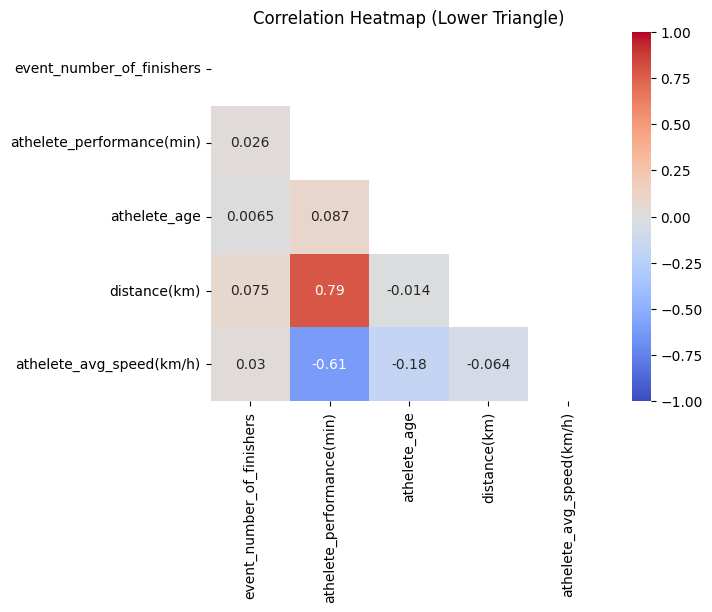

In [48]:
#checking correlation
# Correlation heatmap
# Calculate correlation matrix
corr = df.select_dtypes(include=np.number).corr()

# Create a mask for the upper triangle
msk = np.triu(corr)

# Plot the heatmap with the mask
sns.heatmap(corr, mask=msk, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()

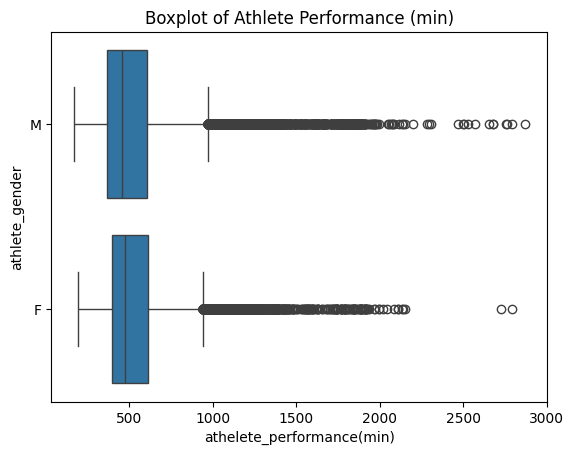

In [49]:
#finding outliers in the athelete_performance(min) column
sns.boxplot(data=df,x="athelete_performance(min)",y="athlete_gender",orient="h")
plt.title('Boxplot of Athlete Performance (min)')
plt.show()

In [50]:
#z-score
# outlier=[]
# def find_out(d):
#     thresh=3
#     mean=np.mean(d)
#     std=np.std(d)

#     for i in d:
#         z_sc=(i-mean)/std
#         if np.abs(z_sc)>thresh:
#             outlier.append(i)
#     return outlier
# find_out(df["athelete_performance(min)"])
# print(outlier)

In [51]:
#IQR test
q1=df["athelete_performance(min)"].quantile(0.25)
q3=df["athelete_performance(min)"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)

24.055000000000064 962.2549999999999


#capping-->replacing/changing outliers values to upper or lower limit values

new_df=df.copy()

new_df.loc[new_df["athelete_performance(min)"]<lower_bound,"athelete_performance(min)"]=lower_bound
new_df.loc[new_df["athelete_performance(min)"]>upper_bound,"athelete_performance(min)"]=upper_bound

In [52]:
#removing outliers(triming the data with)
df.drop(df[df["athelete_performance(min)"] < lower_bound].index, inplace=True)
df.drop(df[df["athelete_performance(min)"] > upper_bound].index, inplace=True)
df.reset_index(drop=True)

,event_dates,event_name,event_number_of_finishers,athelete_performance(min),athlete_club,athlete_gender,athelete_age,distance(km),athelete_avg_speed(km/h)
0,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,593.08,"Middleville, MI",M,35,80.467,8.144433
1,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,698.28,"Utica, MI",M,32,80.467,6.912973
2,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,716.58,"Grass Lake, MI",M,30,80.467,6.739280
3,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,752.27,"Olaton, KY",M,23,80.467,6.416826
4,2018-06-01,Yankee Springs 50 Mile Winter Challenge (USA),9,759.60,"Wyoming, MI",M,39,80.467,6.356003
...,...,...,...,...,...,...,...,...,...
317804,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Peachtree City, GA",F,35,50.000,9.310987
317805,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.17,"Fayetteville, GA",M,50,50.000,9.310987
317806,1995-07-01,Atlanta Fat Ass 50K (USA),22,322.97,"Millen, GA",F,58,50.000,9.293680
317807,1995-07-01,Atlanta Fat Ass 50K (USA),22,328.72,"Winston-Salem, NC",M,51,50.000,9.124088


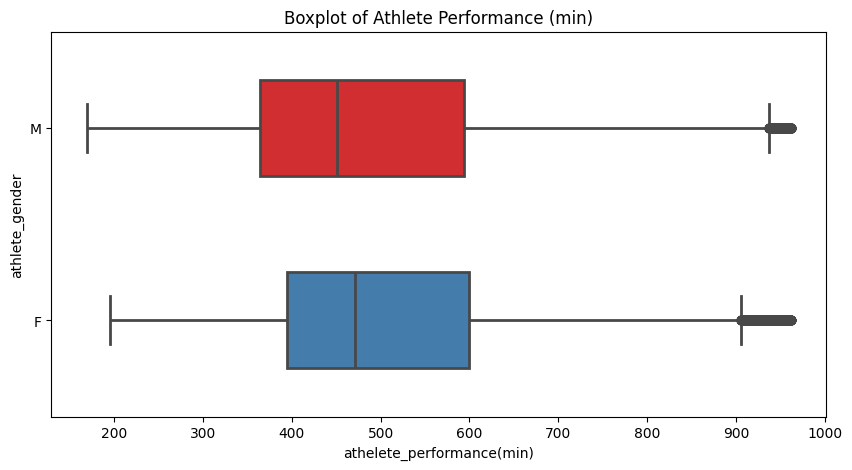

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="athelete_performance(min)",y="athlete_gender",
            orient="h",width=0.5,palette="Set1",hue="athlete_gender",saturation=0.8,linewidth=2)
plt.title('Boxplot of Athlete Performance (min)')
plt.show()

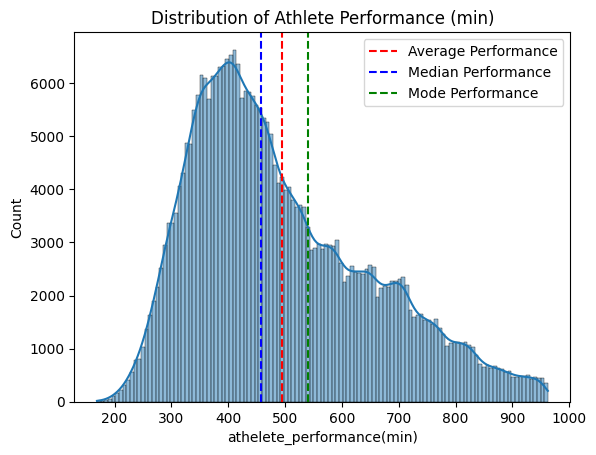

In [54]:
# Distribution plots
# Calculate the average performance
average_performance = df['athelete_performance(min)'].mean()
meadian_performance = df['athelete_performance(min)'].median()
mode_performance = df['athelete_performance(min)'].mode().iloc[0]

# Create the histogram plot
sns.histplot(df['athelete_performance(min)'], kde=True)
plt.title('Distribution of Athlete Performance (min)')

# Add the average line
plt.axvline(average_performance, color='r', linestyle='--', label='Average Performance')

# Add the median line
plt.axvline(meadian_performance, color='b', linestyle='--', label='Median Performance')

# Add the mode line
plt.axvline(mode_performance, color='g', linestyle='--', label='Mode Performance')

# Add a legend
plt.legend()

plt.show()

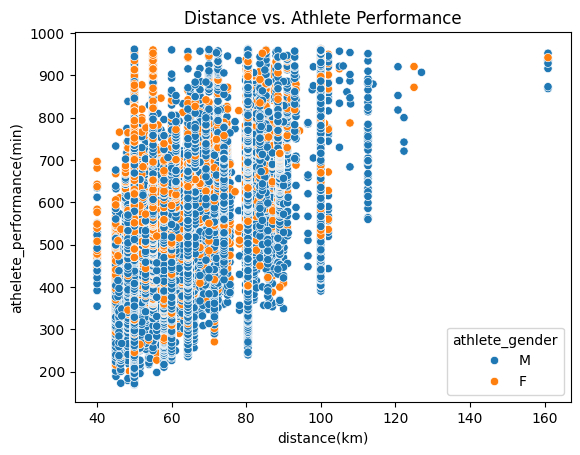

In [55]:
sns.scatterplot(data=df, x='distance(km)', y='athelete_performance(min)',hue='athlete_gender')
plt.title('Distance vs. Athlete Performance')
plt.show()

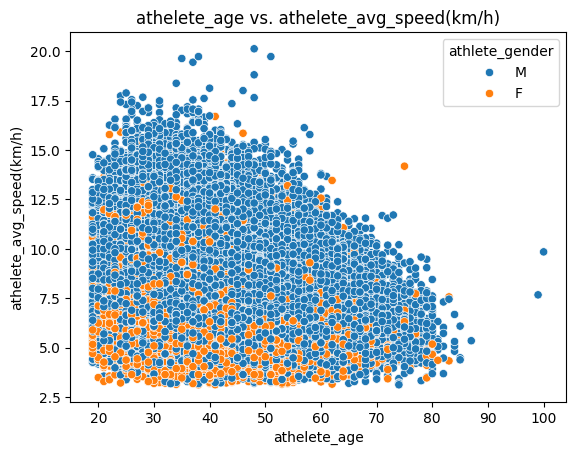

In [56]:
sns.scatterplot(data=df, x='athelete_age', y='athelete_avg_speed(km/h)',hue='athlete_gender')
plt.title('athelete_age vs. athelete_avg_speed(km/h)')
plt.show()

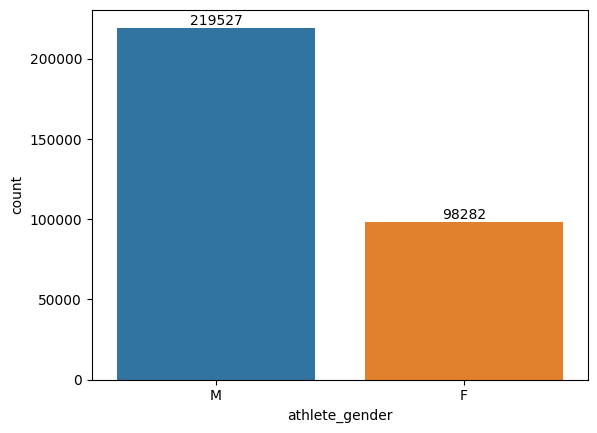

In [92]:
ax=sns.countplot(data=df,x="athlete_gender",hue="athlete_gender")
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
# plt.pie(df["athlete_gender"].groupby(df["athlete_gender"]).count(),
#         labels=["female","male"],
#         autopct="%1.1f%%",
#         startangle=90,
#         explode=[0.03,0],
#         colors=["#FF0000","#0000FF"],
#         textprops={'fontsize': 12},
#         shadow=True)
# plt.title("Gender Distribution")
# plt.show()

Exploratory data analysis

In [93]:
performance=df.groupby('athlete_gender')['athelete_avg_speed(km/h)'].mean().reset_index()

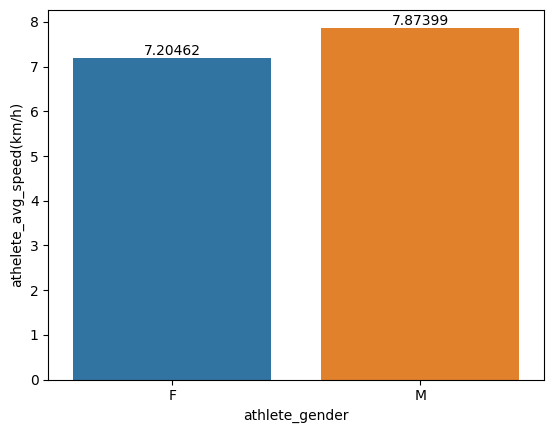

In [94]:
ab=sns.barplot(data=performance,x="athlete_gender",y='athelete_avg_speed(km/h)',hue="athlete_gender")
for i in ab.containers:
    ab.bar_label(i)